In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

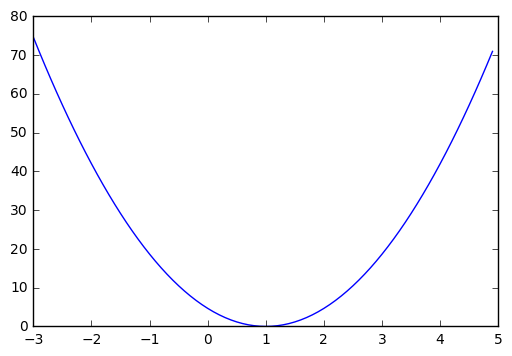

In [2]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

W_history = []
cost_history = []

for i in range(-30, 50):
    curr_W = i * 0.1
    curr_cost = sess.run(cost, feed_dict={W: curr_W})
    W_history.append(curr_W)
    cost_history.append(curr_cost)
    
# Show the cost function
plt.plot(W_history, cost_history)
plt.show()

In [3]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# W - 기울기(미분값)
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 2.7960339 [1.7740479]
1 0.7953159 [1.4128255]
2 0.22622328 [1.2201736]
3 0.06434795 [1.1174259]
4 0.018303426 [1.0626272]
5 0.0052063074 [1.0334011]
6 0.0014809003 [1.0178139]
7 0.00042123246 [1.0095007]
8 0.00011981949 [1.0050671]
9 3.4082386e-05 [1.0027025]
10 9.694737e-06 [1.0014414]
11 2.7582944e-06 [1.0007688]
12 7.842187e-07 [1.00041]
13 2.2306203e-07 [1.0002186]
14 6.343146e-08 [1.0001166]
15 1.807041e-08 [1.0000622]
16 5.1252678e-09 [1.0000331]
17 1.4526146e-09 [1.0000176]
18 4.1164583e-10 [1.0000094]
19 1.1698376e-10 [1.000005]
20 3.2097585e-11 [1.0000026]


위의 과정들, 즉 미분 값을 직접 계산해 식을 만드는 것은 식이 복잡해지면 
직접 구현하는 것이 불가능하다

위의 과정은 앞의 lab02에서 쓴

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train= optimizer.minimize(cost)
    
로 대체 가능하다 (편리하게 만들어놓은것)